NAME : PINJARI DANISH 
INTERNSHIP IN OASIS INFOBYTE
DOMAIN : DATA ANALYTICS

Exploratory Data Analysis (EDA) on Retail Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('../data/raw/retail_sales_dataset.csv')

In [3]:
ds.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
ds.sort_values(by ='Date',inplace=True) # Sorts the values in Ascending order from the start of the month
ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 521 to 649
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 78.1+ KB


In [5]:
ds['Date']=pd.to_datetime(ds['Date']) 
ds['Month']=ds['Date'].dt.month_name()

In [6]:
ds['Quantity'].max()
ds['Quantity'].min()
ds['Price per Unit'].max()
ds['Price per Unit'].min()

25

In [7]:
ds['Quantity'].sum()
ds['Quantity'].mean()
ds['Total Amount'].sum() # It will give The total Amount
ds['Total Amount'].mean() # This will give us the Mean/ Average Amount throughout the Data
ds['Product Category'].value_counts() # Gives the count of each value in the column
ds['Gender'].value_counts()
ds.value_counts('Month') # Another syntax to count the values in a columnn
ds['Age'].mean() # Mean/ Average Age of the Customer
ds[ds['Gender']=='Male']['Age'].mean() # Mean/ Average Age of the male customer
round(ds[ds['Gender']=='Female']['Age'].mean(),2) # Mean/ Average Age of the male and rounding the value to 2 decimal places

41.36

In [8]:
ds[(ds['Product Category']=='Beauty')& (ds['Gender']=='Male')].count() 

Transaction ID      141
Date                141
Customer ID         141
Gender              141
Age                 141
Product Category    141
Quantity            141
Price per Unit      141
Total Amount        141
Month               141
dtype: int64

In [9]:
ds[(ds['Month']=='April')]['Quantity'].sum()
# Will give the total quantity of goods sold in the Month April

214

In [10]:
ds[ds['Quantity']==ds['Quantity'].max()]
#gives All the rows which have the maximum quantity

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
558,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200,January
149,150,2023-01-06,CUST150,Female,58,Electronics,4,30,120,January
859,860,2023-01-09,CUST860,Male,63,Clothing,4,50,200,January
183,184,2023-01-10,CUST184,Male,31,Electronics,4,50,200,January
224,225,2023-01-11,CUST225,Female,57,Beauty,4,25,100,January
...,...,...,...,...,...,...,...,...,...,...
756,757,2023-12-25,CUST757,Female,43,Electronics,4,300,1200,December
81,82,2023-12-26,CUST082,Female,32,Beauty,4,50,200,December
663,664,2023-12-28,CUST664,Female,44,Clothing,4,500,2000,December
907,908,2023-12-29,CUST908,Male,46,Beauty,4,300,1200,December


In [11]:
ds.groupby('Gender')['Product Category'].value_counts()
#gives the total of each category bought by each gender

Gender  Product Category
Female  Clothing            174
        Electronics         170
        Beauty              166
Male    Clothing            177
        Electronics         172
        Beauty              141
Name: count, dtype: int64

In [12]:
ds[(ds['Month']=='December')]['Product Category'].value_counts()
# Gives the units sold in the month of December

Product Category
Electronics    40
Clothing       26
Beauty         25
Name: count, dtype: int64

In [13]:
ds.groupby('Month')['Total Amount'].sum().sort_values()

Month
September    23620
March        28990
April        33870
November     34920
July         35465
June         36715
August       36960
January      36980
February     44060
December     44690
October      46580
May          53150
Name: Total Amount, dtype: int64

In [14]:
ds[(ds['Gender']=='Female') & (ds['Month']=='April')].groupby('Product Category').agg({'Quantity':'sum','Total Amount':['sum','count']})

Quantity Total Amount      
                      sum          sum count
Product Category                            
Beauty                 45         6165    19
Clothing               56         8020    22
Electronics            20         3115     9

In [15]:
ds.groupby('Product Category')['Total Amount'].sum()
#Total Amount of each category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

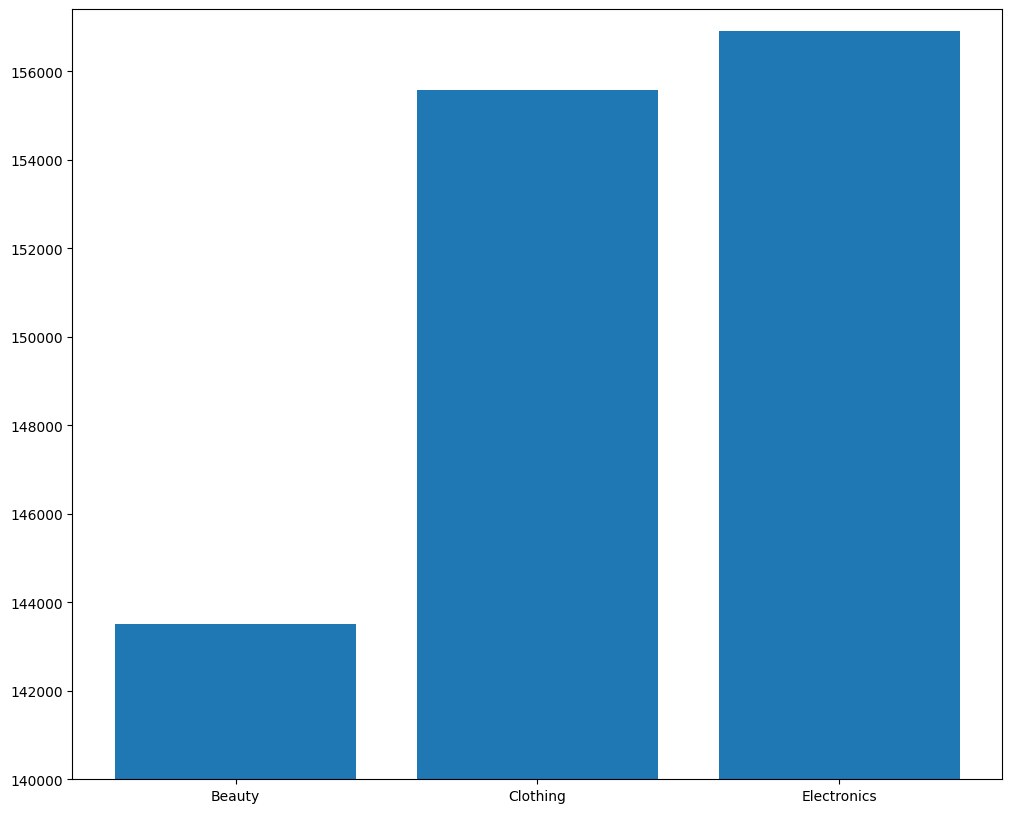

In [16]:
plt.figure(figsize=(12,10))
plt.bar(ds.groupby('Product Category')['Total Amount'].sum().index,ds.groupby('Product Category')['Total Amount'].sum())
plt.ylim(140000, max(ds.groupby('Product Category')['Total Amount'].sum()) + 500)
plt.show()

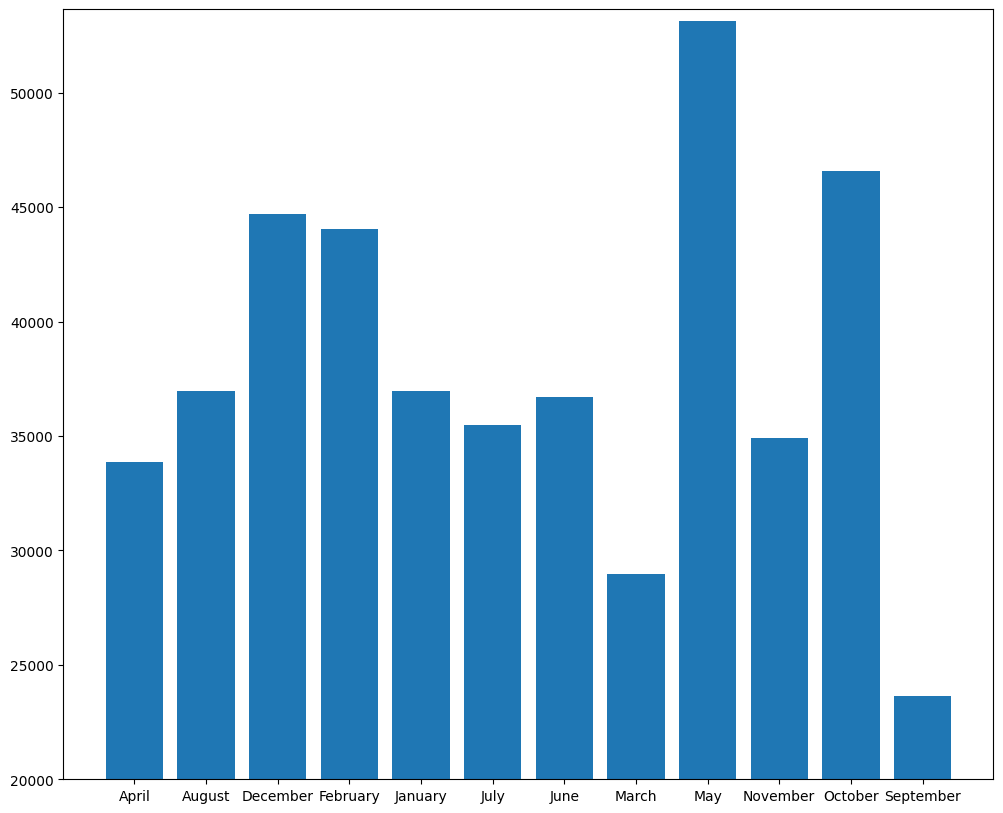

In [17]:
plt.figure(figsize=(12,10))
plt.bar(ds.groupby('Month')['Total Amount'].sum().index,ds.groupby('Month')['Total Amount'].sum())
plt.ylim(20000,max(ds.groupby('Month')['Total Amount'].sum() +500))
plt.show()

In [18]:
ds[ds['Total Amount']== ds['Total Amount'].max()]
# gives all the rows having the Maximum order

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
742,743,2023-01-16,CUST743,Female,34,Beauty,4,500,2000,January
14,15,2023-01-16,CUST015,Female,42,Electronics,4,500,2000,January
741,742,2023-01-21,CUST742,Female,38,Electronics,4,500,2000,January
419,420,2023-01-23,CUST420,Female,22,Clothing,4,500,2000,January
591,592,2023-01-24,CUST592,Female,46,Beauty,4,500,2000,January
268,269,2023-02-01,CUST269,Male,25,Clothing,4,500,2000,February
576,577,2023-02-13,CUST577,Male,21,Beauty,4,500,2000,February
415,416,2023-02-17,CUST416,Male,53,Electronics,4,500,2000,February
256,257,2023-02-19,CUST257,Male,19,Beauty,4,500,2000,February
151,152,2023-02-28,CUST152,Male,43,Electronics,4,500,2000,February


In [19]:
ds[(ds['Age']>40)& (ds['Product Category']=='Clothing')].groupby('Month')['Quantity'].sum()

Month
April        47
August       45
December     25
February     32
January      31
July         30
June         39
March        64
May          63
November     31
October      46
September    38
Name: Quantity, dtype: int64